In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

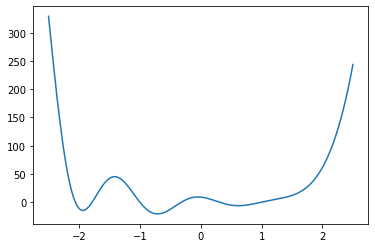

In [431]:
x=np.linspace(-2.5,2.5,1000)
f=10*np.cos(3*np.pi*x/2)*np.exp(-x)+x**6-1
plt.plot(x,f)

          xl     f(xl)        xr     f(xr)        xu     f(xu)        ea
0   0.000000  9.024359  0.250000  2.063661  0.500000 -5.241428  1.000000
1   0.250000  9.024359  0.375000  2.063661  0.500000 -5.241428  0.333333
2   0.250000  2.063661  0.312500 -2.273223  0.375000 -5.241428 -0.200000
3   0.250000  2.063661  0.281250 -0.292909  0.312500 -2.273223 -0.111111
4   0.281250  2.063661  0.296875  0.778958  0.312500 -0.292909  0.052632
5   0.296875  0.778958  0.304688  0.238184  0.312500 -0.292909  0.025641
6   0.304688  0.238184  0.308594  0.059953  0.312500 -0.292909  0.012658
7   0.304688  0.059953  0.306641 -0.117108  0.308594 -0.292909 -0.006369
8   0.304688  0.059953  0.305664 -0.117108  0.306641 -0.117108 -0.003195
9   0.304688  0.059953  0.305176 -0.117108  0.305664 -0.117108 -0.001600
10  0.305176  0.059953  0.305420  0.059953  0.305664 -0.117108  0.000799
11  0.305176  0.059953  0.305298 -0.117108  0.305420 -0.117108 -0.000400
12  0.305298  0.059953  0.305359  0.059953  0.30542

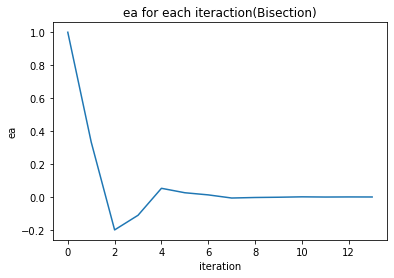

          xl     f(xl)        xr     f(xr)        xu     f(xu)        ea
0   0.000000  9.024359  0.316294 -0.467359  0.500000 -5.241428  1.000000
1   0.000000  9.024359  0.200084  3.895273  0.316294 -5.241428 -0.580809
2   0.200084  9.024359  0.310572 -0.292909  0.316294 -0.467359  0.355758
3   0.200084  3.895273  0.298735  0.238184  0.310572 -0.467359 -0.039622
4   0.298735  3.895273  0.309744 -0.117108  0.310572 -0.292909  0.035541
5   0.298735  0.238184  0.303673  0.059953  0.309744 -0.292909 -0.019993
6   0.303673  0.238184  0.307743 -0.117108  0.309744 -0.117108  0.013226
7   0.303673  0.059953  0.305051  0.059953  0.307743 -0.117108 -0.008825
8   0.305051  0.059953  0.305962 -0.117108  0.307743 -0.117108  0.002979
9   0.305051  0.059953  0.305359 -0.117108  0.305962 -0.117108 -0.001974
10  0.305051  0.059953  0.305155  0.059953  0.305359 -0.117108 -0.000669
11  0.305155  0.059953  0.305224  0.059953  0.305359 -0.117108  0.000226
12  0.305224  0.059953  0.305270  0.059953  0.30535

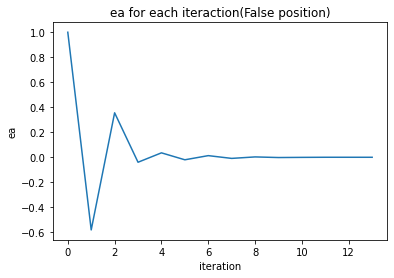

In [433]:
def approx(p):
    return f[np.argmin(abs(p-x))]
def bisection(xl,xu,es=1e-4):
    xr=(xu+xl)/2
    ea=1
    data=[]
    while abs(ea)>es:
        f_xl=approx(xl)
        f_xr=approx(xr)
        f_xu=approx(xu)
        if len(data)==0:
            data=np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])
        if f_xl*f_xu>0:
            raise 'there is no any root'
        elif f_xl*f_xr>0:
            xl=xr
            xr=(xu+xl)/2
            ea=(xr-xl)/xr
        else:
            xu=xr
            xr=(xu+xl)/2
            ea=(xr-xu)/xr
        data=np.vstack((data,np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])))
    print(pd.DataFrame(data,columns=['xl','f(xl)','xr','f(xr)','xu','f(xu)','ea']))
    plt.plot(data[:,6])
    plt.xlabel('iteration')
    plt.ylabel('ea')
    plt.title('ea for each iteraction(Bisection)')
    plt.show()
def falseposition(xl,xu,es=1e-4):
    ea=1
    data=[]
    while abs(ea)>es:
        f_xl=approx(xl)
        f_xu=approx(xu)
        if len(data)==0:
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            f_xr=approx(xr)
            data=np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])
        if f_xl*f_xu>0:
            raise 'there is no any root'
        elif f_xl*f_xr>0:
            xl=xr
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            ea=(xr-xl)/xr
        else:
            xu=xr
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            ea=(xr-xu)/xr
        f_xr=approx(xr)
        data=np.vstack((data,np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])))
    print(pd.DataFrame(data,columns=['xl','f(xl)','xr','f(xr)','xu','f(xu)','ea']))
    plt.plot(data[:,6])
    plt.xlabel('iteration')
    plt.ylabel('ea')
    plt.title('ea for each iteraction(False position)')
    plt.show()
    
bisection(0,0.5)
falseposition(0,0.5)
    

          xl     f(xl)        xr     f(xr)        xu      f(xu)        ea
0   0.500000 -5.241428  1.250000  5.435598  2.000000  61.549937  1.000000
1   0.500000 -5.241428  0.875000  5.435598  1.250000  61.549937 -0.428571
2   0.875000 -5.241428  1.062500 -2.902462  1.250000   5.435598  0.176471
3   0.875000 -2.902462  0.968750  1.466049  1.062500   5.435598 -0.096774
4   0.968750 -2.902462  1.015625 -0.736953  1.062500   1.466049  0.046154
5   0.968750 -0.736953  0.992188  0.314839  1.015625   1.466049 -0.023622
6   0.992188 -0.736953  1.003906 -0.151924  1.015625   0.314839  0.011673
7   0.992188 -0.151924  0.998047  0.081727  1.003906   0.314839 -0.005871
8   0.998047 -0.151924  1.000977 -0.035044  1.003906   0.081727  0.002927
9   1.000977 -0.035044  1.002441 -0.035044  1.003906   0.081727  0.001461
10  1.000977 -0.035044  1.001709  0.081727  1.002441   0.081727 -0.000731
11  1.000977 -0.035044  1.001343  0.081727  1.001709   0.081727 -0.000366
12  1.000977 -0.035044  1.001160  0.08

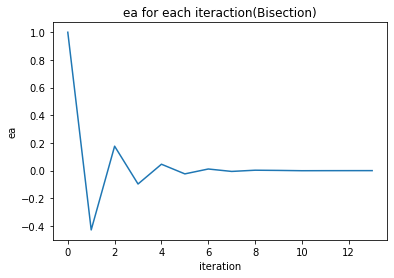

          xl     f(xl)        xr     f(xr)        xu      f(xu)        ea
0   0.500000 -5.241428  0.617712 -6.193372  2.000000  61.549937  1.000000
1   0.617712 -5.241428  0.726186 -5.476768  2.000000  61.549937  0.149376
2   0.726186 -6.193372  0.842644 -3.535847  2.000000  61.549937  0.138205
3   0.842644 -5.476768  0.937212 -1.436115  2.000000  61.549937  0.100903
4   0.937212 -3.535847  0.994949 -0.151924  2.000000  61.549937  0.058030
5   0.994949 -1.436115  1.017864  0.431129  2.000000  61.549937  0.022514
6   0.994949 -0.151924  0.995005 -0.151924  1.017864  61.549937 -0.022974
7   0.995005 -0.151924  1.000961 -0.035044  1.017864   0.431129  0.005951
8   1.000961 -0.151924  1.005366  0.081727  1.017864   0.431129  0.004381
9   1.000961 -0.035044  1.001292  0.081727  1.005366   0.431129 -0.004068
10  1.000961 -0.035044  1.001061  0.081727  1.001292   0.081727 -0.000231
11  1.000961 -0.035044  1.000991 -0.035044  1.001061   0.081727 -0.000069


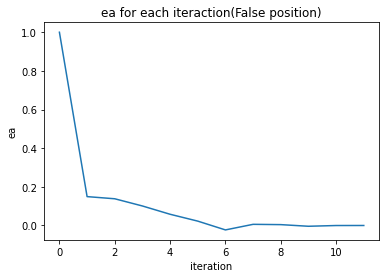

In [434]:
bisection(0.5,2)
falseposition(0.5,2)

In [382]:
class Simulation:
    #set the initial condition according to 3-(d)
    def __init__(self,theta,S_minus,t,T1,T2):
        self.S=S_minus
        self.theta=theta
        self.t=t
        self.T1=T1
        self.T2=T2
    #3-(a) create a matrix such that rotate a vector around the x-axis by an angle.
    def rotate_x(self):
        R=np.array([[1,0,0],[0,np.cos(self.theta),-np.sin(self.theta)],[0,np.sin(self.theta),np.cos(self.theta)]])
        self.S=R.dot(self.S)
    #3-(b) modulation
    def modulate(self):
        D1=np.array([[np.exp(-self.t/self.T2),0,0],[0,np.exp(-self.t/self.T2),0],[0,0,np.exp(-self.t/self.T1)]])
        D2=np.array([[0],[0],[1-np.exp(-self.t/self.T1)]])
        self.S=D1.dot(self.S)+D2
    #3-(c) clean up the x- and y- components
    def cleanup(self):
        self.S=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(self.S)
    #3-(d)
    def projection(self):
        Sxy=np.sqrt(np.square(self.S[0])+np.square(self.S[1]))
        return Sxy


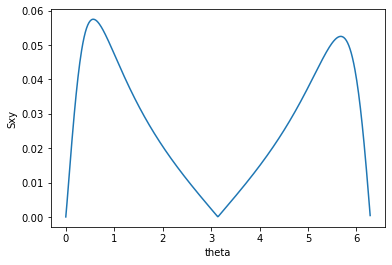

In [383]:
#3-(e)
t=250
T1=1500
T2=200
N=500
theta_space=np.linspace(0,2*np.pi,N)
S=np.array([[0],[0],[1]])
Sxy=np.zeros(N)
for i,theta in enumerate(theta_space):
    case=Simulation(theta,S,t,T1,T2)
    case.rotate_x()
    case.modulate()
    Sxy[i]=case.projection()
    S=case.S
plt.plot(theta_space,Sxy)
plt.xlabel('theta')
plt.ylabel('Sxy')
plt.show()

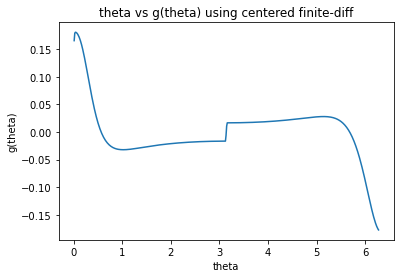

                 0         1         2         3         4         5
theta     0.566620  0.579211  3.135297  3.147888  5.666199  5.678791
g(theta)  0.000072 -0.002570 -0.006069  0.010465  0.001551 -0.000370


In [384]:
#3-(f),let h=0.001 and neglect O(h^2),then g(theta)=(Sxy(i+1)-Sxy(i))/2h where i is the i-th term of Sxy
h=theta_space[1]-theta_space[0]
#create an array to store theta and g(theta)
g=np.zeros((2,N-2))
for i in range(1,N-1,1):
    g[0][i-1]=theta_space[i]
    #use centered finite-diff. to approximate first derivative
    g[1][i-1]=(Sxy[i+1]-Sxy[i-1])/(2*h)
plt.plot(g[0],g[1])
plt.xlabel('theta')
plt.ylabel('g(theta)')
plt.title('theta vs g(theta) using centered finite-diff')
plt.show()
#
root=[]
for i in range(N-3):
    if g[1][i]*g[1][i+1]<0:
        if len(root)==0:
            root=np.expand_dims(g[:,i],axis=1)
        else:
            root=root=np.hstack((root,np.expand_dims(g[:,i],axis=1)))
        root=np.hstack((root,np.expand_dims(g[:,i+1],axis=1)))
print(pd.DataFrame(root,index=['theta','g(theta)']))



In [435]:
#3-(g)
class GoldenSection:
    def __init__(self,xl,xu,es=1e-3):
        self.xl=xl
        self.xu=xu
        self.es=es
        self.ea=1
        self.data=[]
    def approximate(self,x):
        y=Sxy[np.argmin(abs(x-theta_space))]
        return y
    def update(self):
        l=self.xu-self.xl
        phi=(1+np.sqrt(5))/2
        d=(phi-1)*l
        self.x1=self.xl+d
        self.x2=self.xu-d
        self.f_x1=self.approximate(self.x1)
        self.f_x2=self.approximate(self.x2)
        if len(self.data)==0:
            self.data=np.array([self.xl,self.x2,self.f_x2,self.x1,self.f_x1,self.xu,self.ea])
        else:
            self.data=np.vstack((self.data,np.array([self.xl,self.x2,self.f_x2,self.x1,self.f_x1,self.xu,self.ea])))
        if self.f_x1<self.f_x2:
            self.xu=self.x1
            xopt=self.x2
        else:
            self.xl=self.x2
            xopt=self.x1
        self.ea=(2-phi)*abs(self.xu-self.xl)/xopt
    def iteration(self):
        while abs(self.ea)>self.es:
            self.update()
        print(pd.DataFrame(self.data,columns=['xl','x2','f(x2)','x1','f(x1)','xu','ea']))

interval=GoldenSection(0.1,1.5)
interval.iteration()
print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
interval=GoldenSection(4,6)
interval.iteration()

          xl        x2     f(x2)        x1     f(x1)        xu        ea
0   0.100000  0.634752  0.057088  0.965248  0.048337  1.500000  1.000000
1   0.100000  0.430495  0.054855  0.634752  0.057088  0.965248  0.520668
2   0.430495  0.634752  0.057088  0.760990  0.054670  0.965248  0.321790
3   0.430495  0.556733  0.057453  0.634752  0.057088  0.760990  0.198877
4   0.430495  0.508514  0.056990  0.556733  0.057453  0.634752  0.140138
5   0.508514  0.556733  0.057453  0.586534  0.057406  0.634752  0.086610
6   0.508514  0.538315  0.057398  0.556733  0.057453  0.586534  0.053528
7   0.538315  0.556733  0.057453  0.568116  0.057471  0.586534  0.033082
8   0.556733  0.568116  0.057471  0.575151  0.057454  0.586534  0.020036
9   0.556733  0.563768  0.057471  0.568116  0.057471  0.575151  0.012383
10  0.563768  0.568116  0.057471  0.570803  0.057471  0.575151  0.007653
11  0.568116  0.570803  0.057471  0.572464  0.057471  0.575151  0.004708
12  0.570803  0.572464  0.057471  0.573490  0.05745

In [386]:
#3-(h)
print(np.arccos(np.exp(-t/T1)))

0.678044584402778
